# Tech Challenge - IA para Devs: Fase 1

## Introdução e Justificativa da Escolha do Dataset

Doenças cardiovasculares representam uma das principais causas de mortalidade global, tornando a implementação de ferramentas de suporte ao diagnóstico uma necessidade real em ambientes clínicos. A capacidade de analisar um vasto volume de dados médicos e identificar padrões complexos pode otimizar a triagem de pacientes e auxiliar os profissionais de saúde na tomada de decisões informadas, agilizando processos e potencialmente salvando vidas.

Este projeto visa desenvolver a base de um sistema inteligente de suporte ao diagnóstico, utilizando técnicas de Machine Learning. Para atingir este objetivo, selecionamos o conjunto de dados ["Heart Disease" (Doença Cardíaca)](https://www.kaggle.com/datasets/oktayrdeki/heart-disease), disponível na plataforma Kaggle.

### Motivos para a Escolha do Dataset "Heart Disease":

1 - Relevância Clínica: A predição de doença cardíaca é um problema real com potencial para aplicações práticas em hospitais e clínicas.

2 - Natureza da Classificação: O conjunto de dados é estruturado para uma tarefa de classificação binária (presença ou ausência de doença cardíaca), que se alinha perfeitamente com o requisito do desafio de realizar um diagnóstico "a pessoa tem ou não uma doença". Isso permite a aplicação direta de diversos algoritmos de Machine Learning focados em classificação.

3 - Variedade de Atributos: O dataset contém uma série de atributos clínicos e demográficos relevantes (como idade, sexo, tipo de dor no peito, pressão arterial, colesterol, entre outros), que são comumente utilizados na prática médica para avaliar o risco cardiovascular. Esta riqueza de informações permitirá explorar a influência de diferentes fatores no diagnóstico.

4 - Disponibilidade e Acessibilidade: Sendo um dataset público e amplamente utilizado na comunidade de Machine Learning, facilita a validação e a comparação de resultados, além de possuir uma estrutura fácil que favorece a aplicação dos conceitos propostos no Tech Challenge.

### O que se Pretende Descobrir com Este Dataset:

Com a utilização do dataset "Heart Disease", este projeto pretende descobrir e validar:

1 - Modelos Preditivos Eficazes: O principal objetivo é desenvolver modelos de Machine Learning capazes de prever com alta acurácia a presença de doença cardíaca em indivíduos, com base em suas características clínicas e resultados de exames.

2 - Fatores de Risco Mais Influentes: Através da análise de feature importance e outras técnicas de interpretabilidade (como SHAP, se aplicável em etapas futuras), busca-se identificar quais atributos do paciente (variáveis) são os mais relevantes e preditivos para o diagnóstico de doença cardíaca. Isso pode oferecer insights valiosos que complementem o conhecimento médico.

3 - Robustez e Viabilidade do Modelo: Avaliar a performance dos modelos utilizando métricas adequadas (como acurácia, precisão, recall e F1-score) para determinar sua robustez e potencial de aplicação prática como ferramenta de suporte ao diagnóstico em um ambiente hospitalar, sempre ressaltando que a decisão final é do profissional médico.


## Análise do Dataset: Heart Diseases (Doença Cadíaca)

Neste notebook, vamos realizar uma análise exploratória e construir um modelo de Machine Learning para prever doenças cardíacas com base em hábitos, estilos de vida, genética, e outras características.

Nesta análise, iremos realizar etapas de machine learning, como:

- Carregamento e exploração dos dados
- Limpeza e pré-processamento
- Modelagem (ML)
- Avaliação dos modelos
- Interpretação dos resultados

## Primeira análise dos dados

Vamos visualizar as primeiras linhas do dataset para entender as colunas disponíveis, seus tipos e possíveis problemas (valores ausentes, inconsistências, etc).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from ydata_profiling import ProfileReport


# Estilo de gráficos
sns.set(style="whitegrid")

# Carregar o dataset
base = pd.read_csv('https://raw.githubusercontent.com/antrafa/fiap-tech-challenge-6IADT/refs/heads/main/data/heart_disease.csv')

# Visualizar as primeiras linhas
base.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,Yes,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,Yes,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,Yes,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,No,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,No,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


## Análise preliminar do dataset

Aqui estão as colunas:

| Coluna                   | Descrição                                                                                     |
|--------------------------|-----------------------------------------------------------------------------------------------|
| `Age`                    | A idade do indivíduo.                                                                         |
| `Gender`                 | O sexo do indivíduo (Masculino ou Feminino)                                                   |
| `Blood Pressure`         | A pressão arterial do indivíduo (sistólica)                                                   |
| `Cholesterol Level`      | O nível total de colesterol do indivíduo.                                                     |
| `Exercise Habits`        | Os hábitos de exercício do indivíduo (Baixo, Médio, Alto)                                     |
| `Smoking`                | Se o indivíduo fuma ou não (Sim ou Não)                                                       |
| `Family Heart Disease`   | Se há histórico familiar de doença cardíaca (Sim ou Não)                                      |
| `Diabetes`               | Se o indivíduo tem diabetes (Sim ou Não)                                                      |
| `BMI`                    | O índice de massa corporal do indivíduo.                                                      |
| `High Blood Pressure`    | Se o indivíduo tem pressão alta (Sim ou Não)                                                  |
| `Low HDL Cholesterol`    | Se o indivíduo tem colesterol HDL baixo (Sim ou Não)                                          |
| `High LDL Cholesterol`   | Se o indivíduo tem colesterol LDL alto (Sim ou Não)                                           |
| `Alcohol Consumption`    | O nível de consumo de álcool do indivíduo (Nenhum, Baixo, Médio, Alto)                        |
| `Stress Level`           | O nível de estresse do indivíduo (Baixo, Médio, Alto)                                         |
| `Sleep Hours`            | O número de horas que o indivíduo dorme.                                                      |
| `Sugar Consumption`      | O nível de consumo de açúcar do indivíduo (Baixo, Médio, Alto)                                |
| `Triglyceride Level`     | O nível de triglicerídeos do indivíduo.                                                       |
| `Fasting Blood Sugar`    | O nível de açúcar no sangue em jejum do indivíduo.                                            |
| `CRP Level`              | O nível de proteína C-reativa (um marcador de inflamação)                                     |
| `Homocysteine Level`     | O nível de homocisteína do indivíduo (um aminoácido que afeta a saúde dos vasos sanguíneos)   |
| `Heart Disease Status`   | Alvo da análise: O status de doença cardíaca do indivíduo (Sim ou Não)                         |

In [79]:
base.shape

(10000, 21)

In [80]:
# Informações sobre o dataset
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

#### Ao analizar as informações do dataset, podemos ver:

- Ele possui 10000 linhas. Isso é um bom volume de dados para treinamento do nosso modelo;

- Temos 21 colunas no total, como havíamos identificado anteriormente;

- 9 colunas são do tipo `float64` (números decimais). Isso inclui `Age`, `Blood Pressure`, `Cholesterol Level`, `BMI`, `Sleep Hours`, `Triglyceride Level`, `Fasting Blood Sugar`, `CRP Level`, `Homocysteine Level`. São boas para cálculos numéricos.

- 12 colunas são do tipo `object`. Isso geralmente indica que a coluna contém `strings` ou `dados mistos`. Essas colunas são: `Gender`, `Exercise Habits`, `Smoking`, `Family Heart Disease`, `Diabetes`, `High Blood Pressure`, `Low HDL Cholesterol`, `High LDL Cholesterol`, `Alcohol Consumption`, `Stress Level`, `Sugar Consumption`, e `Heart Disease Status`.

    - Muitas dessas colunas (`Gender`, `Smoking`, `Diabetes`, `Heart Disease Status`, ...) são categóricas, e precisarão ser convertidas para um formato numérico antes de usarmos em algoritmos de Machine Learning.

- Ao analizar a contagem de valores não-nulos das colunas, vemos que muitas possuem valores abaixo de 10000, nos dizendo que existem valores ausentes em várias colunas.

    - A coluna `Alcohol Consumption` se destaca por ter apenas 7414 non-null valores, indicando que ela tem um número significativo de valores ausentes (10000 - 7414 = 2586 valores nulos).

- A única coluna que tem 10000 non-null valores é `Heart Disease Status`. Isso é excelente, pois significa que nossa variável alvo não tem dados ausentes, o que simplifica o pré-processamento para ela.


#### Conclusões e Próximos Passos (Pré-processamento de Dados):

Com base nesta análise, já podemos identificar algumas tarefas de pré-processamento que precisaremos realizar:

1 - Tratamento de Valores Ausentes:

Precisamos decidir como lidar com os valores nulos em colunas como `Age`, `Blood Pressure`, `Cholesterol Level`, `Alcohol Consumption`,... As estratégias comuns incluem:

 - Remover linhas com valores nulos (se forem poucas e não impactarem muito o tamanho do dataset).

- Imputar valores (substituir nulos pela média, mediana, moda ou um valor constante, dependendo do tipo de dado e da distribuição).

2 - Conversão de Variáveis Categóricas:

Todas as 12 colunas do tipo object que representam categorias (como `Gender`, `Exercise Habits`, `Smoking`, `Heart Disease Status`,...) precisarão ser convertidas para representações numéricas.

- Para variáveis binárias (Yes/No, Male/Female), podemos usar mapeamento manual (0/1).

- Para variáveis com mais de duas categorias (Low/Medium/High, None/Low/Medium/High), podemos usar LabelEncoder (se a ordem importar, como em níveis de estresse) ou One-Hot Encoding (se não houver uma ordem intrínseca e para evitar que o modelo interprete como ordem).

- A coluna `Heart Disease Status` contém 'Yes'/'No' e precisaremos converte-la para 0/1.


In [81]:
print(base.isnull().sum())

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


Na saída acima podemos ver o número exato de valores nulos para cada coluna

In [82]:
# Estatísticas básicas
base.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


### Análise estatística com `.describe()`

O comando `describe` exibe estatísticas descritivas básicas para cada coluna numérica do dataset:

| Estatística    | Significado                                                    |
| -------------- | -------------------------------------------------------------- |
| `count`        | Quantidade de valores não nulos                                |
| `mean`         | Média (valor médio)                                            |
| `std`          | Desvio padrão (dispersão dos dados)                            |
| `min`          | Valor mínimo                                                   |
| `25%`          | Primeiro quartil (Q1) – 25% dos dados estão abaixo desse valor |
| `50%` (median) | Mediana – metade dos dados está abaixo                         |
| `75%`          | Terceiro quartil (Q3) – 75% dos dados estão abaixo desse valor |
| `max`          | Valor máximo                                                   |

---

**Pontos chave a serem observados para o pré-processamento:**

- Valores Ausentes: Todas as colunas numéricas (e também as categóricas, como vimos com `base.info()`) possuem um pequeno número de valores ausentes. Precimsamos decidir a melhor estratégia para imputá-los.

- Distribuição dos Dados: As médias e medianas estão geralmente próximas, sugerindo que as distribuições não são extremamente assimétricas para a maioria das colunas numéricas. Na sequencia, iremos visualizar com histogramas para confirmar.

- Escala dos Dados: As colunas numéricas estão em escalas diferentes (e.g., Idade vai de 18-80, Colesterol de 150-300, etc.). Isso significa que, para muitos algoritmos de Machine Learning, será necessário realizar o escalonamento dos dados (padronização ou normalização) após a imputação de nulos.

---

## Tratamento de dados


#### Com base no base.info() sabemos que:

 - Colunas Numéricas (com nulos): `Age`, `Blood Pressure`, `Cholesterol Level`, `BMI`, `Sleep Hours`, `Triglyceride Level`, `Fasting Blood Sugar`, `CRP Level`, `Homocysteine Level`.

 - Colunas Categóricas (com nulos): `Gender`, `Exercise Habits`, `Smoking`, `Family Heart Disease`, `Diabetes`, `High Blood Pressure`, `Low HDL Cholesterol`, `High LDL Cholesterol`, `Alcohol Consumption`, `Stress Level`, `Sugar Consumption`.

 - Variável Alvo (sem nulos): Heart Disease Status.

#### Estratégias de Imputação que vamos aplicar:

 - Para colunas numéricas: Imputação pela mediana. A mediana é mais robusta a outliers do que a média.

 - Para colunas categóricas: Imputação pela moda (o valor mais frequente).

In [3]:
# Criando uma copia da base
base_tratada = base.copy()
print("Contagem de valores nulos antes do tratamento (em base_tratada):")
print(base_tratada.isnull().sum())

Contagem de valores nulos antes do tratamento (em base_tratada):
Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


Acima podemos entender que a coluna "Alcohol Consumption" tem 25% de linhas nulas, por ser um valor muito alto iremos removê-la.

In [4]:
# Removendo coluna
base_tratada = base_tratada.drop('Alcohol Consumption', axis=1)

#### 1. Imputação de Mediana para Colunas Numéricas 

Identificar colunas numéricas com nulos

In [5]:
numerical_cols_with_na = base_tratada.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("\nImputando valores nulos em colunas numéricas com a mediana...")
for col in numerical_cols_with_na:
    if base_tratada[col].isnull().any():
        median_val = base_tratada[col].median()
        base_tratada[col] = base_tratada[col].fillna(median_val)
        print(f"  - Coluna '{col}': nulos preenchidos com a mediana ({median_val}).")



Imputando valores nulos em colunas numéricas com a mediana...
  - Coluna 'Age': nulos preenchidos com a mediana (49.0).
  - Coluna 'Blood Pressure': nulos preenchidos com a mediana (150.0).
  - Coluna 'Cholesterol Level': nulos preenchidos com a mediana (226.0).
  - Coluna 'BMI': nulos preenchidos com a mediana (29.079491590086043).
  - Coluna 'Sleep Hours': nulos preenchidos com a mediana (7.003252334814371).
  - Coluna 'Triglyceride Level': nulos preenchidos com a mediana (250.0).
  - Coluna 'Fasting Blood Sugar': nulos preenchidos com a mediana (120.0).
  - Coluna 'CRP Level': nulos preenchidos com a mediana (7.472164393020417).
  - Coluna 'Homocysteine Level': nulos preenchidos com a mediana (12.409395381646618).


#### 2. Imputação de Moda para Colunas Categóricas

- Identificar colunas categóricas (object) com nulos
- Excluir 'Heart Disease Status' pois sabemos que não tem nulos e é nossa variável alvo

In [6]:
categorical_cols_with_na = base_tratada.select_dtypes(include='object').columns.tolist()
categorical_cols_with_na.remove('Heart Disease Status')

print("\nImputando valores nulos em colunas categóricas com a moda...")
for col in categorical_cols_with_na:
    if base_tratada[col].isnull().any(): 
        mode_val = base_tratada[col].mode()[0]
        base_tratada[col] = base_tratada[col].fillna(mode_val)
        print(f"  - Coluna '{col}': nulos preenchidos com a moda ('{mode_val}').")



Imputando valores nulos em colunas categóricas com a moda...
  - Coluna 'Gender': nulos preenchidos com a moda ('Male').
  - Coluna 'Exercise Habits': nulos preenchidos com a moda ('High').
  - Coluna 'Smoking': nulos preenchidos com a moda ('Yes').
  - Coluna 'Family Heart Disease': nulos preenchidos com a moda ('No').
  - Coluna 'Diabetes': nulos preenchidos com a moda ('No').
  - Coluna 'High Blood Pressure': nulos preenchidos com a moda ('Yes').
  - Coluna 'Low HDL Cholesterol': nulos preenchidos com a moda ('Yes').
  - Coluna 'High LDL Cholesterol': nulos preenchidos com a moda ('No').
  - Coluna 'Stress Level': nulos preenchidos com a moda ('Medium').
  - Coluna 'Sugar Consumption': nulos preenchidos com a moda ('Low').


#### Verificação final após a imputação

In [6]:
base_tratada.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,Yes,No,Medium,7.633228,Medium,342.0,120.0,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,Yes,No,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,Yes,Yes,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,No,Yes,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,No,No,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [7]:
# Verificação 1: Contagem de valores nulos
print("Contagem de valores nulos após o tratamento:")
print(base_tratada.isnull().sum())

# Verificação 2: Tipos de dados (após imputação)
print("\nTipos de dados das colunas:")
print(base_tratada.info())

# Verificação 3: Valores únicos para algumas colunas categóricas (opcional, mas útil)
print("\nValores únicos em colunas categóricas selecionadas após imputação:")
print(base_tratada['Gender'].unique())
print(base_tratada['Exercise Habits'].unique())
print(base_tratada['Heart Disease Status'].unique())

Contagem de valores nulos após o tratamento:
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

Tipos de dados das colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   10000 non-null  float64
 1   Gender                10000 non-null  object 
 2   Blood Pressure        10000 non-null  float64
 3   Cholesterol Level     100

---

## Análise gráfica

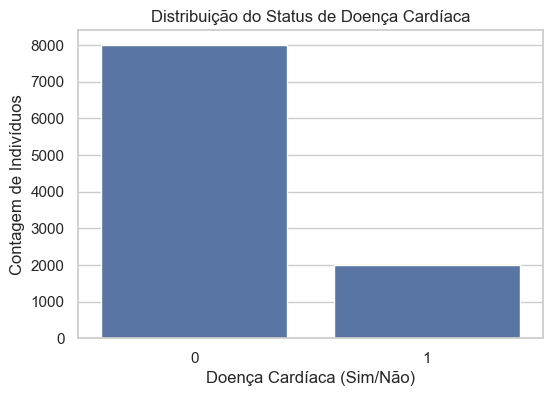

Heart Disease Status
0    8000
1    2000
Name: count, dtype: int64


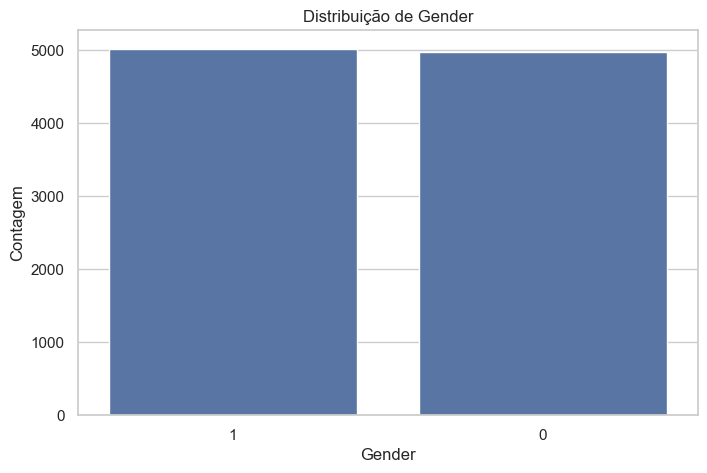

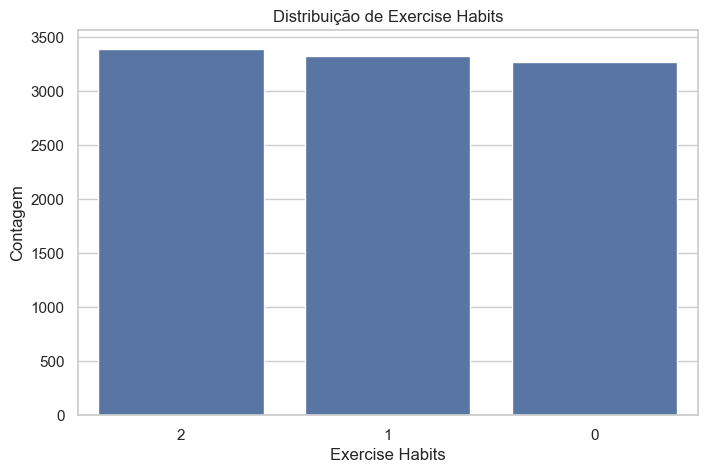

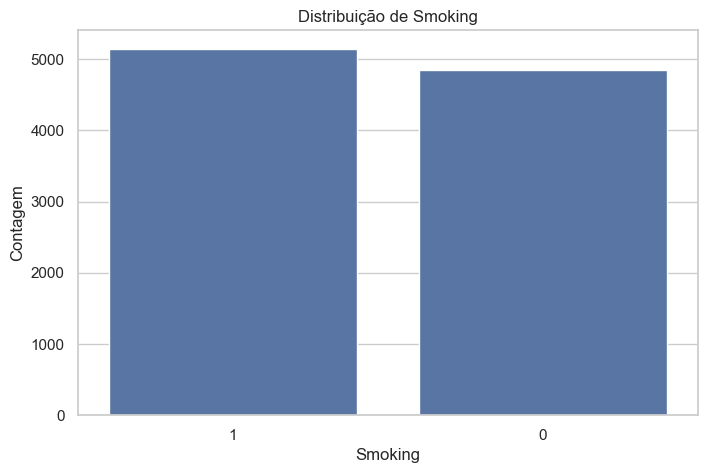

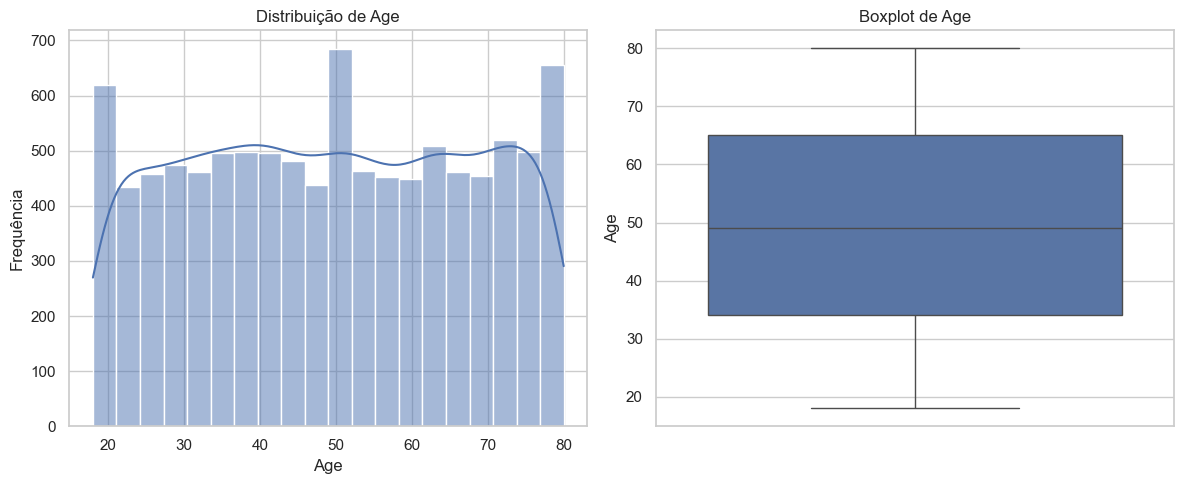

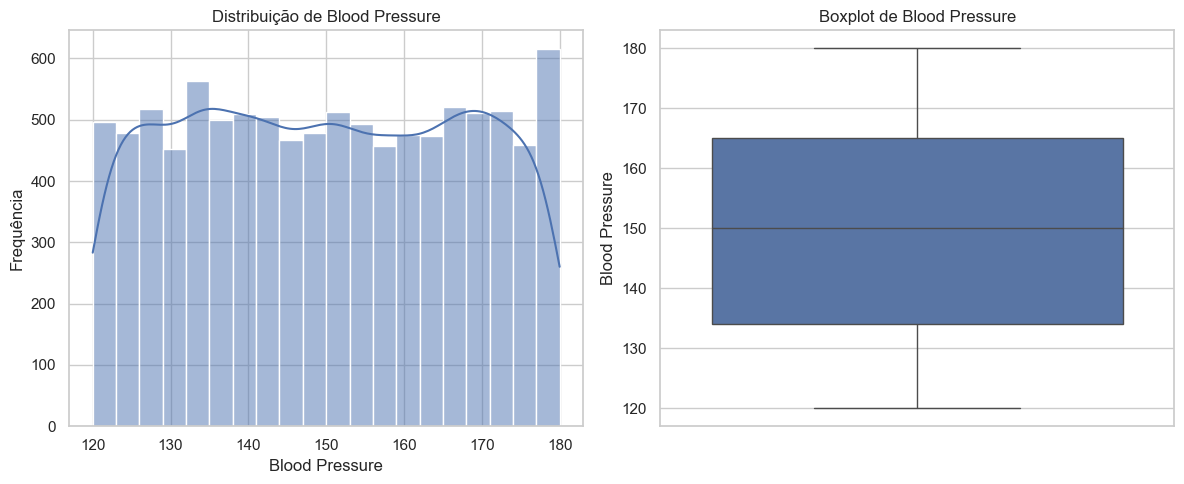

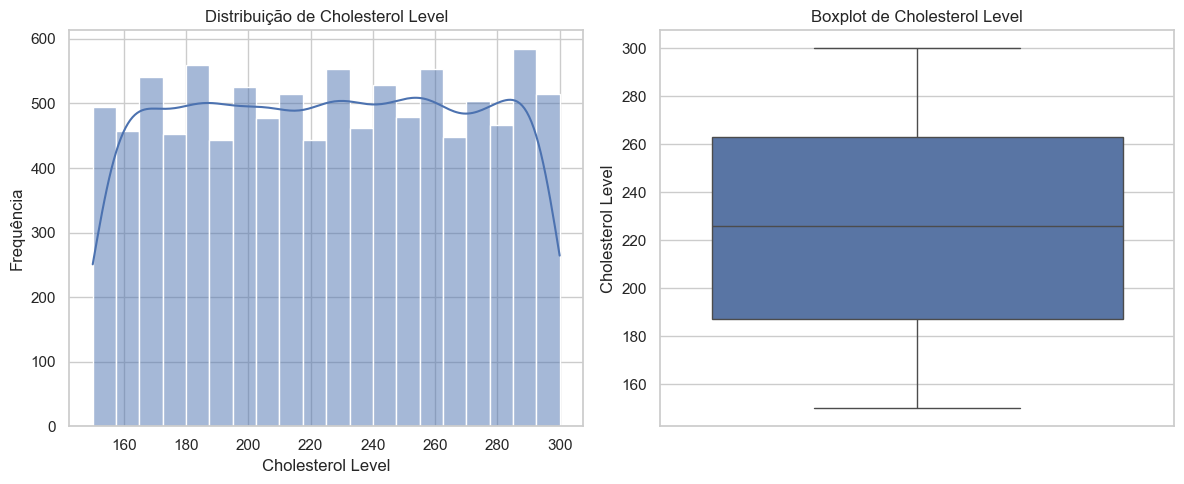

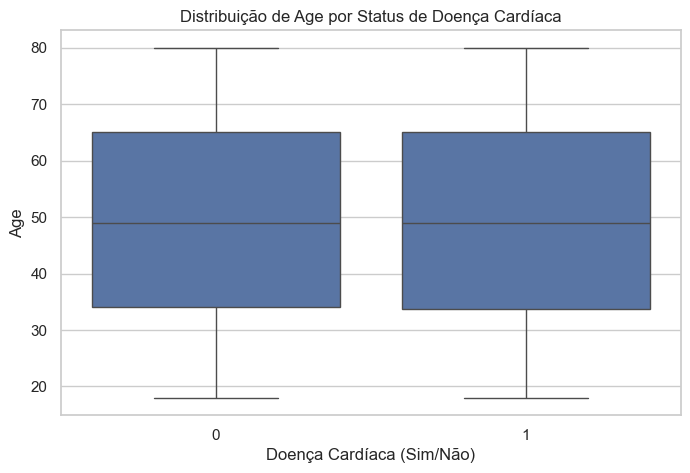

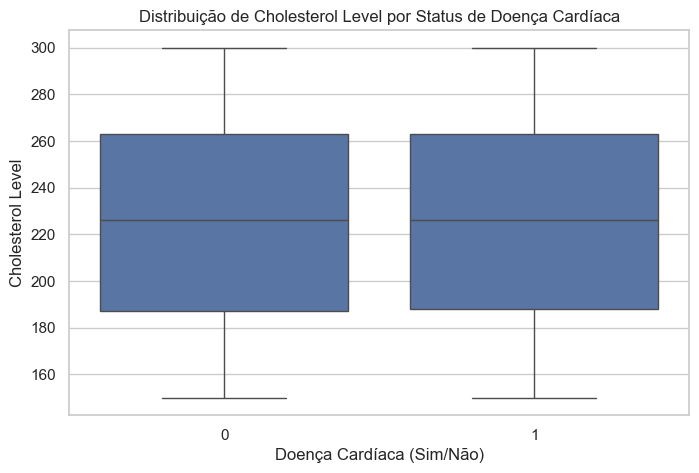

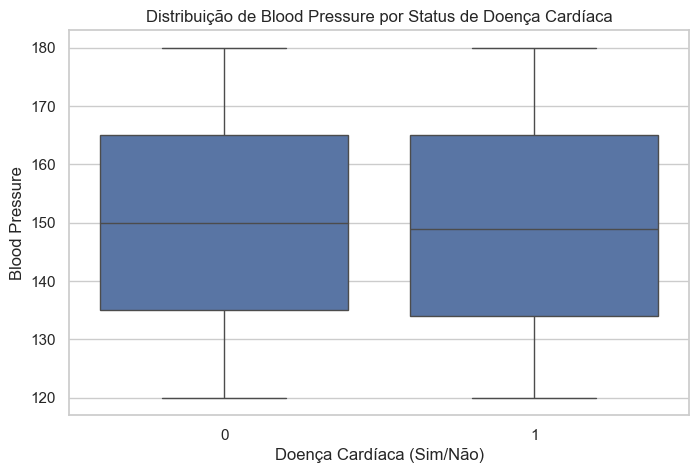

ValueError: Could not interpret value `BMI` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

In [ ]:
# --- 1. Gráfico da Variável Alvo ---
plt.figure(figsize=(6, 4))
sns.countplot(x='Heart Disease Status', data=base_tratada)
plt.title('Distribuição do Status de Doença Cardíaca')
plt.xlabel('Doença Cardíaca (Sim/Não)')
plt.ylabel('Contagem de Indivíduos')
plt.show()
print(base_tratada['Heart Disease Status'].value_counts())


# --- 2. Exemplos de Gráficos para Variáveis Categóricas (Após Imputação) ---
# Escolha algumas das mais relevantes ou que tinham nulos
categorical_cols_for_plot = ['Gender', 'Exercise Habits', 'Smoking']

for col in categorical_cols_for_plot:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=base_tratada, order=base_tratada[col].value_counts().index) # Ordena por frequência
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.show()


# --- 3. Exemplos de Gráficos para Variáveis Numéricas (Histogramas e Boxplots) ---
# Escolha algumas das mais relevantes
numerical_cols_for_plot = ['Age', 'Blood Pressure', 'Cholesterol Level']

for col in numerical_cols_for_plot:
    plt.figure(figsize=(12, 5))

    # Subplot para Histograma
    plt.subplot(1, 2, 1) # 1 linha, 2 colunas, 1º gráfico
    sns.histplot(base_tratada[col], kde=True, bins=20)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

    # Subplot para Boxplot
    plt.subplot(1, 2, 2) # 1 linha, 2 colunas, 2º gráfico
    sns.boxplot(y=base_tratada[col])
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)

    plt.tight_layout() # Ajusta o layout para evitar sobreposição
    plt.show()

# --- 4. Relação entre Variáveis Numéricas e a Variável Alvo (Boxplots Divididos) ---
# Escolha algumas colunas numéricas para comparar com 'Heart Disease Status'
numerical_cols_for_relation_plot = ['Age', 'Cholesterol Level', 'Blood Pressure']

for col in numerical_cols_for_relation_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Heart Disease Status', y=col, data=base_tratada)
    plt.title(f'Distribuição de {col} por Status de Doença Cardíaca')
    plt.xlabel('Doença Cardíaca (Sim/Não)')
    plt.ylabel(col)
    plt.show()

#### Iniciando a conversão de variáveis categóricas para numéricas

In [8]:
# Mapeamento da variável alvo 'Heart Disease Status'
# É crucial que sua variável alvo seja numérica para modelagem
base_tratada['Heart Disease Status'] = base_tratada['Heart Disease Status'].map({'No': 0, 'Yes': 1})
print("  - 'Heart Disease Status' convertido para 0/1.")

# Mapeamento de variáveis binárias Sim/Não
binary_cols_yes_no = ['Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol']
for col in binary_cols_yes_no:
    base_tratada[col] = base_tratada[col].map({'No': 0, 'Yes': 1})
    print(f"  - '{col}' convertido para 0/1 (No=0, Yes=1).")

# Mapeamento da variável 'Gender' (binária)
base_tratada['Gender'] = base_tratada['Gender'].map({'Female': 0, 'Male': 1})
print("  - 'Gender' convertido para 0/1 (Female=0, Male=1).")

# Mapeamento de variáveis ordinais (Low, Medium, High ou None, Low, Medium, High)
# Exercise Habits: Low, Medium, High
base_tratada['Exercise Habits'] = base_tratada['Exercise Habits'].map({'Low': 0, 'Medium': 1, 'High': 2})
print("  - 'Exercise Habits' convertido para 0/1/2 (Low=0, Medium=1, High=2).")

# Stress Level: Low, Medium, High
base_tratada['Stress Level'] = base_tratada['Stress Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
print("  - 'Stress Level' convertido para 0/1/2.")

# Sugar Consumption: Low, Medium, High
base_tratada['Sugar Consumption'] = base_tratada['Sugar Consumption'].map({'Low': 0, 'Medium': 1, 'High': 2})
print("  - 'Sugar Consumption' convertido para 0/1/2.")


# Verificação final dos tipos de dados após as conversões
print("\nTipos de dados após a conversão de categóricas:")
print(base_tratada.info())

  - 'Heart Disease Status' convertido para 0/1.
  - 'Smoking' convertido para 0/1 (No=0, Yes=1).
  - 'Family Heart Disease' convertido para 0/1 (No=0, Yes=1).
  - 'Diabetes' convertido para 0/1 (No=0, Yes=1).
  - 'High Blood Pressure' convertido para 0/1 (No=0, Yes=1).
  - 'Low HDL Cholesterol' convertido para 0/1 (No=0, Yes=1).
  - 'High LDL Cholesterol' convertido para 0/1 (No=0, Yes=1).
  - 'Gender' convertido para 0/1 (Female=0, Male=1).
  - 'Exercise Habits' convertido para 0/1/2 (Low=0, Medium=1, High=2).
  - 'Stress Level' convertido para 0/1/2.
  - 'Sugar Consumption' convertido para 0/1/2.

Tipos de dados após a conversão de categóricas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   10000 non-null  float64
 1   Gender                10000 non-null  int64  
 2   Blood Pressure        10000 

In [9]:
# Verificando a generalização dos dados
base_tratada.nunique()

Age                       63
Gender                     2
Blood Pressure            61
Cholesterol Level        151
Exercise Habits            3
Smoking                    2
Family Heart Disease       2
Diabetes                   2
BMI                     9979
High Blood Pressure        2
Low HDL Cholesterol        2
High LDL Cholesterol       2
Stress Level               3
Sleep Hours             9975
Sugar Consumption          3
Triglyceride Level       301
Fasting Blood Sugar       81
CRP Level               9975
Homocysteine Level      9981
Heart Disease Status       2
dtype: int64

Aqui podemos conferir que as colunas (BMI, Sleep Hours, CRP Level, Homocysteine Level) estão muito generalistas, o que pode atrapalhar o modelo, por este motivo iremos removê-las.

In [10]:
# removendo colunas muito generalistas
base_tratada = base_tratada.drop(['BMI', 'Sleep Hours', 'CRP Level', 'Homocysteine Level'], axis=1)
base_tratada.nunique()

Age                      63
Gender                    2
Blood Pressure           61
Cholesterol Level       151
Exercise Habits           3
Smoking                   2
Family Heart Disease      2
Diabetes                  2
High Blood Pressure       2
Low HDL Cholesterol       2
High LDL Cholesterol      2
Stress Level              3
Sugar Consumption         3
Triglyceride Level      301
Fasting Blood Sugar      81
Heart Disease Status      2
dtype: int64

In [34]:
# sns.pairplot(base,hue='Heart Disease Status')

In [36]:
# sns.heatmap(base_tratada.corr())

---

## Análise detalhada utilizando Pandas Profiling

In [38]:
profile = ProfileReport(base_tratada, title="Relatório de Análise de Doença Cardíaca")
# profile.to_notebook_iframe()
profile.to_file("../../docs/heart_disease_report.html")


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 82.54it/s]


In [ ]:
# quebrando o dataset em treino e teste
from sklearn.model_selection import train_test_split

X = base_tratada.drop('Heart Disease Status', axis=1)
y = base_tratada['Heart Disease Status']

x_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

#importando os modelos de machine learning e as métricas de avaliação
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score

In [33]:
# treinando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_treino, y_treino)
print(f"Score KNN: {knn.score(x_treino, y_treino):.2f}")

Score KNN: 0.81


In [34]:
# treinando o modelo árvore de decisão
rfc = DecisionTreeClassifier(random_state=42)
rfc.fit(x_treino, y_treino)
print(f"Score árvore de decisão: {rfc.score(x_treino, y_treino):.2f}")

Score árvore de decisão: 1.00


In [35]:
# treinando o modelo de regressão logística
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(x_treino, y_treino)
print(f"Score Regressão Logística: {lr.score(x_treino, y_treino):.2f}")

Score Regressão Logística: 0.80


Acima podemos verificar o treinamento dos modelos utilizando o score, que indica a precisão do modelo nos dados de treino.

In [28]:
# testando os modelos
knn_pred = knn.predict(X_teste)
rfc_pred = rfc.predict(X_teste)
lr_pred = lr.predict(X_teste)

In [29]:
# avaliando os modelos pela matriz de confusão
print(f"Matrix Confusão KNN: {confusion_matrix(y_teste, knn_pred)}")
print(f"Matrix Confusão Decision Tree: {confusion_matrix(y_teste, rfc_pred)}")
print(f"Matrix Confusão Logistic Regression: {confusion_matrix(y_teste, lr_pred)}")

Matrix Confusão KNN: [[1513  100]
 [ 366   21]]
Matrix Confusão Decision Tree: [[1270  343]
 [ 302   85]]
Matrix Confusão Logistic Regression: [[1613    0]
 [ 387    0]]


Olhando pelo ponto de vista da matriz de confusão, podemos entender que o melhor modelo é a árvore de decisão, pois ele conseguiu prever mais pessoas com risco de infarto, que é o que queremos prever.

In [30]:
# avaliando os modelos pela acurácia
print(f"Acurácia KNN: {accuracy_score(y_teste, knn_pred):.2f}")
print(f"Acurácia Decision Tree: {accuracy_score(y_teste, rfc_pred):.2f}")
print(f"Acurácia Logistic Regression: {accuracy_score(y_teste, lr_pred):.2f}")

Acurácia KNN: 0.77
Acurácia Decision Tree: 0.68
Acurácia Logistic Regression: 0.81


Pela acurácia podemos observar que o modelo que teve mais acertos foi de Regressão Logistica

In [31]:
# avaliando os modelos pela presisão
print(f"Precisão KNN: {precision_score(y_teste, knn_pred):.2f}")
print(f"Precisão Decision Tree: {precision_score(y_teste, rfc_pred):.2f}")
print(f"Precisão Logistic Regression: {precision_score(y_teste, lr_pred):.2f}")

Precisão KNN: 0.17
Precisão Decision Tree: 0.20
Precisão Logistic Regression: 0.00


c:\Users\eduar\desenv\workspace\fiap-tech-challenge-6IADT\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Acima conseguimos confirmar que até o momento o modelo de árvore de decisão continua sendo o melhor modelo para o que queremos prever.

In [ ]:
# avaliando os modelos pelo recall
print(f"Recall KNN: {recall_score(y_teste, knn_pred):.2f}")
print(f"Recall Decision Tree: {recall_score(y_teste, rfc_pred):.2f}")
print(f"Recall Logistic Regression: {recall_score(y_teste, lr_pred):.2f}")

Precisão KNN: 0.05
Precisão Decision Tree: 0.22
Precisão Logistic Regression: 0.00


O recall confirma que o melhor modelo para o que queremos prever é a árvore de decisão.